In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [21]:
testData = pd.read_csv(r'E:\\ML\\New folder\\Untitled Folder\\test.csv')
trainData = pd.read_csv(r'E:\\ML\\New folder\\Untitled Folder\\train.csv',nrows=400)
print(testData.shape)
print(trainData.shape)
print(testData.columns)
print(trainData.columns)

(9914, 7)
(400, 8)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [23]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.2+ KB


In [24]:
trainData.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [25]:
trainData['pickup_datetime']=pd.to_datetime(trainData['pickup_datetime'])
testData['pickup_datetime']=pd.to_datetime(testData['pickup_datetime'])

In [26]:
testData.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [27]:
trainData.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [28]:
trainData.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,11.305950,-72.126878,39.732933,-72.125748,39.733367,1.662500
std,8.813764,11.564053,6.370372,11.563876,6.370476,1.322106
min,2.500000,-74.035839,0.000000,-74.035839,0.000000,0.000000
25%,6.000000,-73.992891,40.736506,-73.992431,40.732439,1.000000
50%,8.500000,-73.982185,40.752811,-73.980713,40.751816,1.000000
75%,12.900000,-73.968219,40.766435,-73.964059,40.767612,2.000000
max,58.000000,0.000000,40.828531,0.000000,40.881878,6.000000


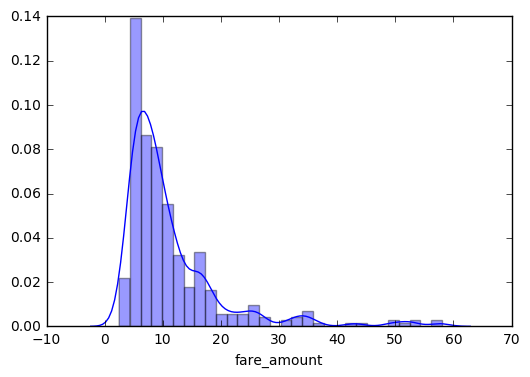

In [30]:
import seaborn as sns
sns.distplot(trainData['fare_amount'])

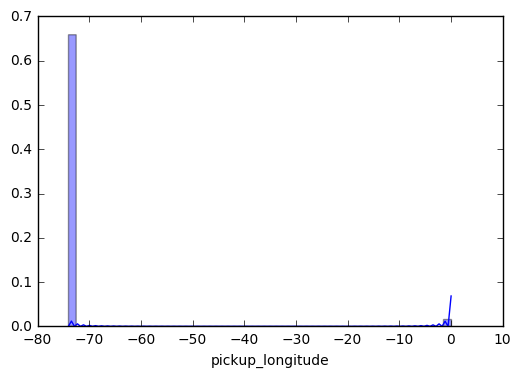

In [31]:
sns.distplot(trainData['pickup_longitude'])

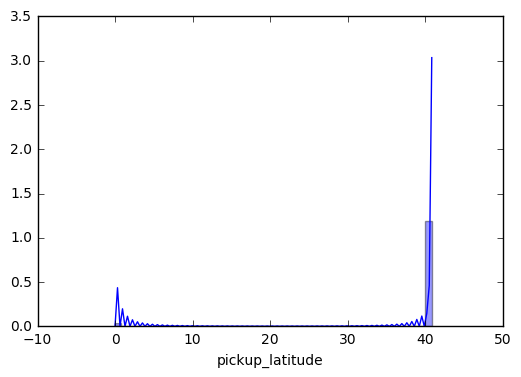

In [32]:
sns.distplot(trainData['pickup_latitude'])

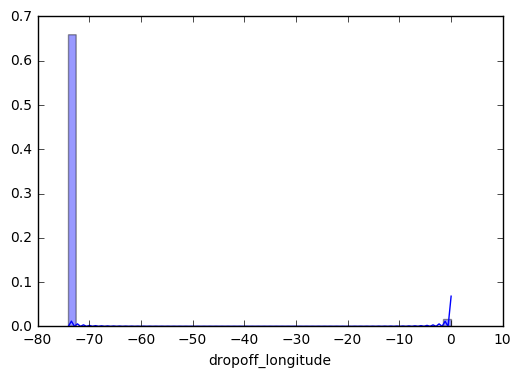

In [33]:
sns.distplot(trainData['dropoff_longitude'])

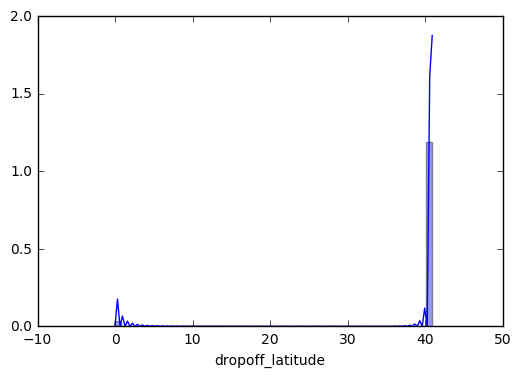

In [34]:
sns.distplot(trainData['dropoff_latitude'])

In [35]:
print(testData['pickup_longitude'].max())
print(testData['pickup_longitude'].min())
print(testData['pickup_latitude'].max())
print(testData['pickup_latitude'].min())
print(testData['dropoff_longitude'].max())
print(testData['dropoff_longitude'].min())
print(testData['dropoff_latitude'].min())
print(testData['dropoff_latitude'].max())




-72.986532
-74.252193
41.709555
40.573143
-72.990963
-74.263242
40.568973
41.696683


In [36]:
min_longitude=-74.263242
max_longitude=-72.986532
max_latitude=41.709555
min_latitude=40.573143

In [37]:
temp =trainData[(trainData['pickup_longitude']<min_longitude) | (trainData['pickup_longitude']>max_longitude) | (trainData['pickup_latitude']>max_latitude) | (trainData['pickup_latitude']<min_latitude)|(trainData['dropoff_longitude']<min_longitude) | (trainData['dropoff_longitude']>max_longitude) | (trainData['dropoff_longitude']>max_longitude) | (trainData['dropoff_longitude']<min_longitude)]
#tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]

print("before droping",trainData.shape)
trainData.drop(temp.index,inplace=True)
print("after droping",trainData.shape)

before droping (400, 8)
after droping (390, 8)


In [38]:
trainData.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [39]:
import calendar
trainData['day'] = trainData['pickup_datetime'].apply(lambda x:x.day)
trainData['hour'] = trainData['pickup_datetime'].apply(lambda x:x.hour)
trainData['weekday'] = trainData['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
trainData['month'] = trainData['pickup_datetime'].apply(lambda x:x.month)
trainData['year'] = trainData['pickup_datetime'].apply(lambda x:x.year)

In [40]:
trainData.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [41]:
trainData.drop(['key','pickup_datetime'],axis=1, inplace=True)

In [42]:
trainData.weekday = trainData.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})



In [43]:
trainData.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [44]:
trainData=trainData[trainData['passenger_count']<=8]


In [45]:
X = trainData.drop('fare_amount',axis=1)
X.shape

(390, 10)

In [46]:
y = trainData['fare_amount']
y.shape

(390,)

In [47]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
print(X_train.shape)
print(y_test.shape)

(312, 10)
(78,)


C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
res=reg.predict(X_test)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.238865480701
0.196613543377


In [50]:
from sklearn.metrics import mean_squared_error
mat = np.sqrt(mean_squared_error(y_test,res))
mat

6.6732175729382224

In [67]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(n_estimators=100,random_state=101)
tree.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [68]:
tr=tree.predict(X_test)

In [69]:
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.936852248768
0.566750926513


In [70]:
mat1 = np.sqrt(mean_squared_error(y_test,tr))
mat1

4.9005164684645539